This file needs requires external data!

(Run on workstation)

In [1]:
import xarray as xr
import pyproj
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cmocean as cmo
import glob
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import numpy as np
import copy
import sys

sys.path.append('../src')
import utils as ut

In [103]:
mpl.rcParams['figure.subplot.wspace'] = .2
mpl.rcParams['figure.subplot.left'] = .1
mpl.rcParams['figure.subplot.right'] = .9
mpl.rcParams['figure.figsize'] = (9,7)

fname = f'../data/ecefiles/errorfiles/output.abort.nc'
ds = xr.open_dataset(fname)
ds = ds.isel(y=slice(0,105))
ds = ds.isel(deptht=0)
#ds = ds.isel(time_counter=tc)
lat = ds['nav_lat']
lon = ds['nav_lon']
#ssh = ds['vosaline']
#ssh = ds['votemper']
ssh = ds['sossheig']
#ssh = ds['sohefldo']
ds.close()

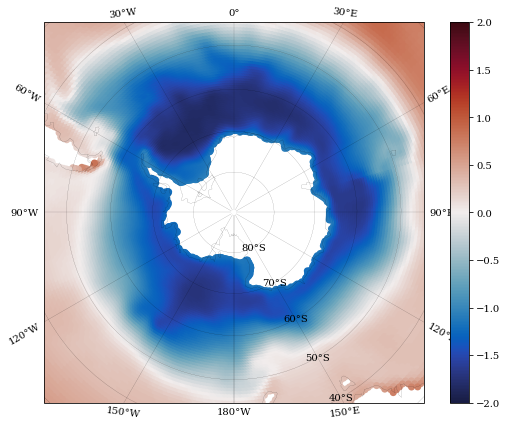

1.0537239 -1.8359078


In [104]:
fig = plt.figure()

cmap = plt.get_cmap('cmo.balance').copy()

ssh = np.where(ssh==0,np.nan,ssh)
#ssh = np.where(ssh<0,np.nan,ssh)

ax = fig.add_subplot(111,projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -45], crs=ccrs.PlateCarree())
im = ax.scatter(lon,lat,50*np.ones(lon.shape),c=ssh,transform=ccrs.PlateCarree(),cmap=cmap,lw=0,vmin=-2,vmax=2)
ax.coastlines(lw=.1)
#ax.legend(bbox_to_anchor=(1.1,0),loc='lower left',markerscale=2)

gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,color='k',linewidth=.1)
gl.xlocator = mticker.FixedLocator(np.arange(-180,210,30))
gl.xformatter = LONGITUDE_FORMATTER
plt.colorbar(im)
#plt.savefig(f'../figures/ssh_error.png',dpi=450)
plt.show()
plt.close()
print(np.nanmax(ssh),np.nanmin(ssh))


In [105]:
fname = f'../data/ecefiles/totl/totl_1m_19700101_19791231_grid_T.nc'
ds = xr.open_dataset(fname)
ds = ds.isel(y=slice(0,105))
#ds = ds.isel(deptht=0)
#ds = ds.isel(time_counter=tc)
lat = ds['nav_lat']
lon = ds['nav_lon']
var = ds['zos'].isel(time_counter=66)
ds.close()

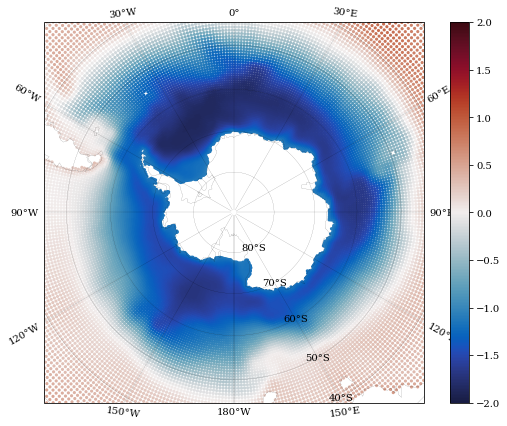

1.060736 -1.8682857


In [106]:
fig = plt.figure()

cmap = plt.get_cmap('cmo.balance').copy()

ax = fig.add_subplot(111,projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -45], crs=ccrs.PlateCarree())
im = ax.scatter(lon,lat,10*np.ones(lon.shape),c=var,transform=ccrs.PlateCarree(),cmap=cmap,lw=0,vmin=-2,vmax=2)
ax.coastlines(lw=.1)
#ax.legend(bbox_to_anchor=(1.1,0),loc='lower left',markerscale=2)

gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,color='k',linewidth=.1)
gl.xlocator = mticker.FixedLocator(np.arange(-180,210,30))
gl.xformatter = LONGITUDE_FORMATTER
plt.colorbar(im)
#plt.savefig(f'../figures/ssh_error.png',dpi=450)
plt.show()
plt.close()
print(np.nanmax(var),np.nanmin(var))
